In [80]:
import sys
sys.path.append('..')
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import matplotlib
import numpy as np

In [81]:
df = pd.read_json('golden_boot.json')
df

,Alex Morgan,Sophia Smith,Debinha,Diana Ordóñez,Mallory Pugh,Ashley Hatch,Ebony Salmon,Bethany Balcer,CeCe Kizer,Lo’eau LaBonta,Savannah McCaskill,Megan Rapinoe,Morgan Weaver,Kristen Hamilton,Kerolin,Nadia Nadim,Rose Lavelle,Nichelle Prince,Christine Sinclair,Hina Sugita
2022-05-01,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
2022-05-07,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-15,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-18,0.0,1.0,0.0,0.0,NaN,1.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2022-05-22,1.0,NaN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2022-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2022-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [82]:
df_cum = df.fillna(0).sort_index().cumsum().T
df_cum

,2022-04-29,2022-04-30,2022-05-01,2022-05-07,2022-05-08,2022-05-13,2022-05-14,2022-05-15,2022-05-18,2022-05-21,...,2022-09-14,2022-09-16,2022-09-17,2022-09-18,2022-09-21,2022-09-24,2022-09-25,2022-09-30,2022-10-01,2022-10-02
Alex Morgan,0.0,0.0,0.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
Sophia Smith,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,11.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0,14.0,14.0
Debinha,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,7.0,7.0,7.0,7.0,9.0,12.0,12.0,12.0,12.0,12.0
Diana Ordóñez,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
Mallory Pugh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,11.0
Ashley Hatch,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0
Ebony Salmon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
Bethany Balcer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,7.0,7.0
CeCe Kizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0
Lo’eau LaBonta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0


<Figure size 28800x16200 with 0 Axes>

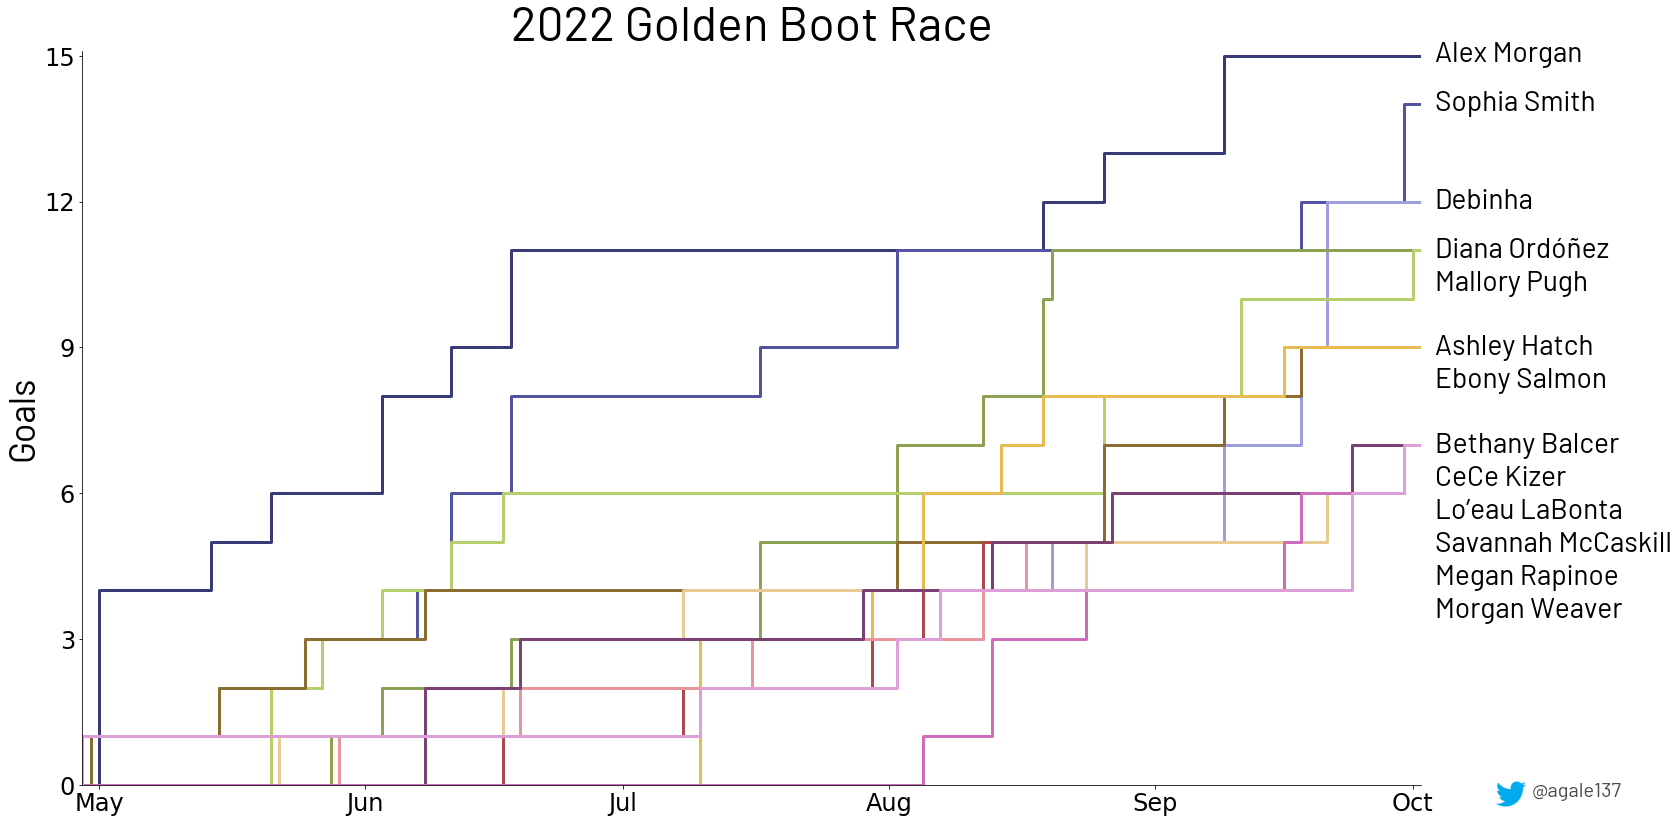

In [99]:
# Used to avoid out of memory
matplotlib.use("agg")

# General
barlow = fm.FontProperties(fname="/home/agale/nwsl-analytics/common/Barlow.otf")
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")

# Colors
tab = matplotlib.cm.get_cmap('tab20b')
tab_13_colors = jet(np.linspace(0, 1, 13))

# Plot data

count = {}
for i, (name, row) in enumerate(df_cum.iloc[0:13].iterrows()):
    ax.step(df_cum.columns, row, label=i, linewidth=3, color=tab_13_colors[i])
    
    offset = 0
    goals = row[-1]
    if goals in count:
        offset = count[goals]
        count[goals] = offset + 1
    else:
        count[goals] = 1
                       
    ax.text(
        1.01,
        row[-1]/15-offset * 0.045 - 0.005,
        name,
        transform=ax.transAxes,
        color="black",
        fontsize=28,
        fontproperties=barlow,
        fontweight="bold",
        va="center",
        ha="left",
    )

# Title
plt.title("2022 Golden Boot Race", fontproperties=barlow, size=48)

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=24)
ax.set_ylim(0, 15.1)
ax.set_yticks([0, 3, 6, 9, 12, 15])
ax.set_xlim([datetime.date(2022, 4, 29), datetime.date(2022, 10, 2)])
plt.ylabel("Goals", fontproperties=barlow, size=36)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

# Username and Twitter logo
plt.text(
    1.15,
    -0.01,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=20,
    alpha=0.7,
    fontproperties=barlow,
    va="center",
    ha="right",
)
im = plt.imread('../common/twitter.png')
newax = fig.add_axes([0.93,0.1,0.03,0.03], anchor='SE', zorder=1)
newax.imshow(im)
newax.axis('off')

# Save image
plt.savefig("golden_boot.png", bbox_inches="tight")